 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = Path('Resources/whale_returns.csv')
whale_df = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON AND CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON AND CO.INC.            1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df = whale_df.dropna().copy()

whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON AND CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_path = Path('Resources/algo_returns.csv')
algo_df = pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df = algo_df.dropna().copy()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices
sp_path = Path('Resources/sp_tsx_history.csv')
sp_df = pd.read_csv(sp_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [9]:
# Check Data Types
sp_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp_df['Close'] = sp_df['Close'].str.replace('$','')
sp_df['Close'] = sp_df['Close'].str.replace(',','')
sp_df['Close'] = sp_df['Close'].astype("float")
sp_df['Close']

Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
                ...   
2019-12-20    17118.44
2019-12-23    17128.71
2019-12-24    17180.15
2019-12-27    17168.21
2019-12-30    17098.56
Name: Close, Length: 1818, dtype: float64

In [11]:
# Calculate Daily Returns
daily_returns = sp_df.pct_change()
daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [12]:
# Drop nulls
daily_returns = daily_returns.dropna().copy()

In [13]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns.columns = ['S&P TSX']
daily_returns.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, daily_returns], axis='columns', join='inner')
combined_df = combined_df.sort_index()
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON AND CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

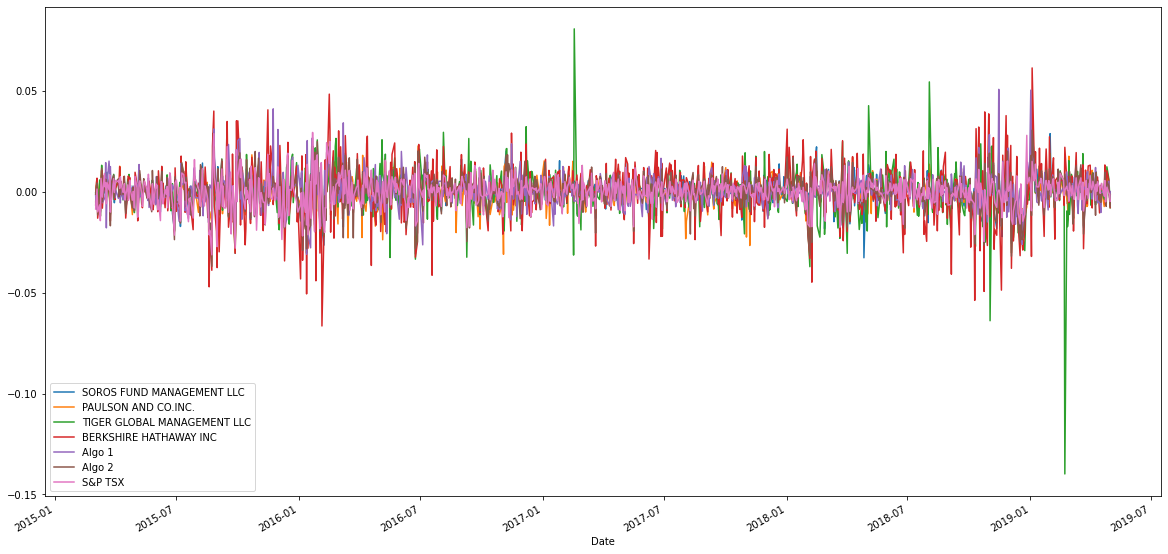

In [15]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

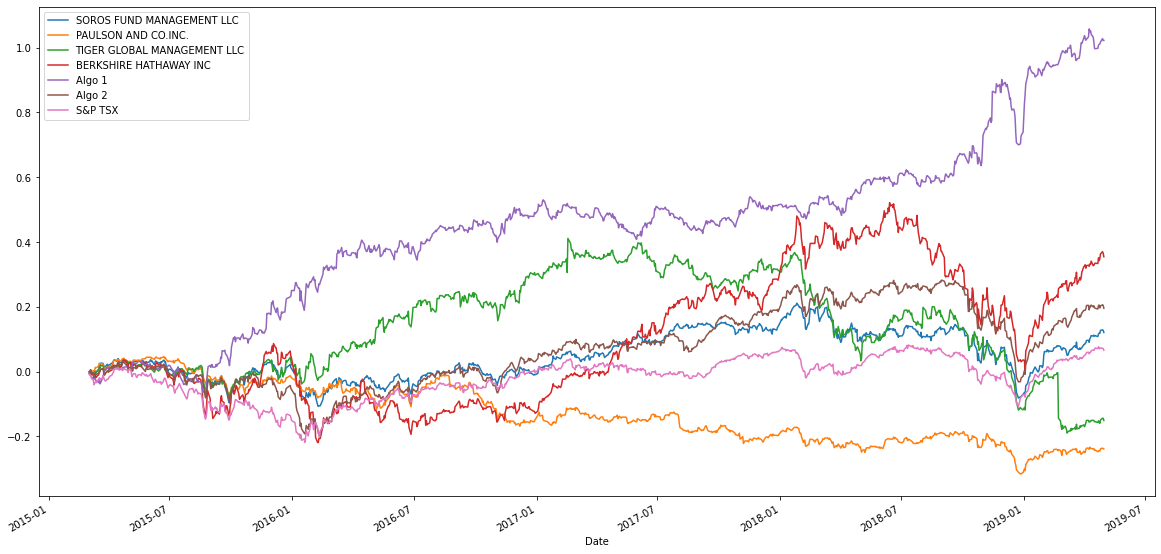

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P TSX 60
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


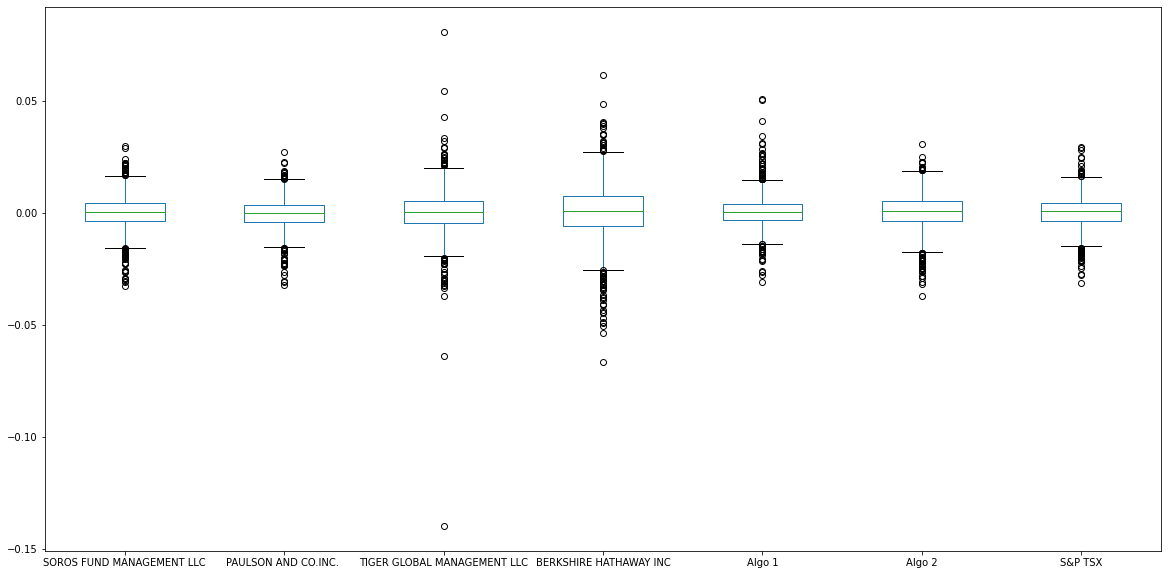

In [17]:
# Box plot to visually show risk
combined_df.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
daily_std_port = combined_df[['SOROS FUND MANAGEMENT LLC', 'PAULSON AND CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2']].std().sort_values(ascending=False)
daily_std_port


BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
PAULSON AND CO.INC.            0.006982
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [19]:
# Calculate  the daily standard deviation of S&P TSX 60
daily_std_sp = combined_df['S&P TSX'].std()
daily_std_sp
# Determine which portfolios are riskier than the S&P TSX 60
# All of the portfolios except paulson and co.inc. have standard deviation larger than 0.007034 which means only paulson and co.inc. is less riskier than the index.

0.007034167748577725

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annulized_std = combined_df.std() * np.sqrt(252)
annulized_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON AND CO.INC.            0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60
3. Calculate and plot a 60-day Beta for Berkshire Hathaway Inc compared to the S&P 60 TSX

### Calculate and plot rolling `std` for all portfolios with 21-day window

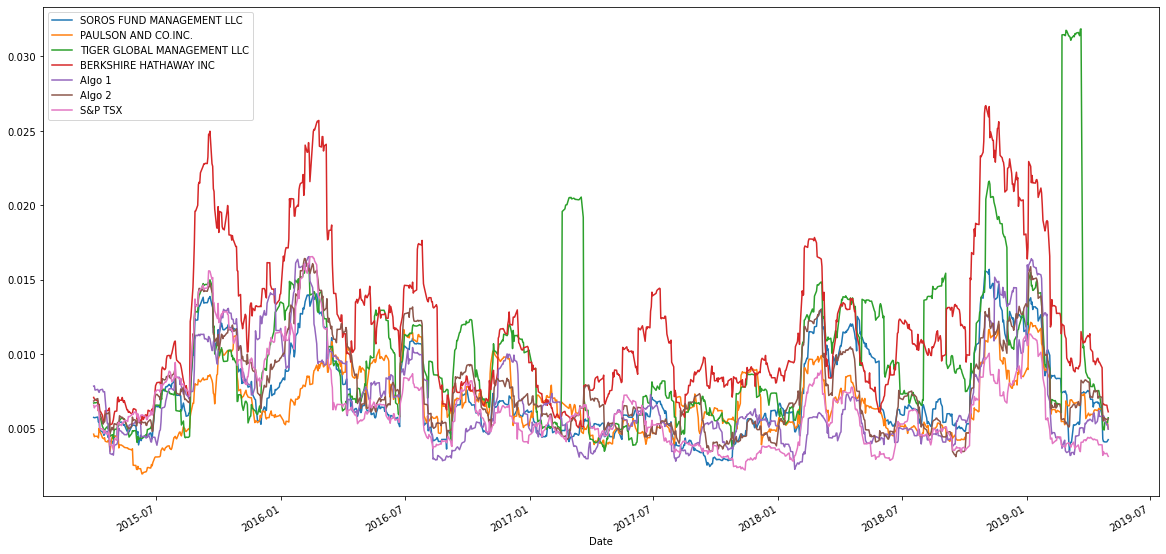

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot(figsize=(20,10))

### Calculate and plot the correlation

In [22]:
# Calculate the correlation
correlation = combined_df.corr()

# Display de correlation matrix
correlation


,SOROS FUND MANAGEMENT LLC,PAULSON AND CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON AND CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

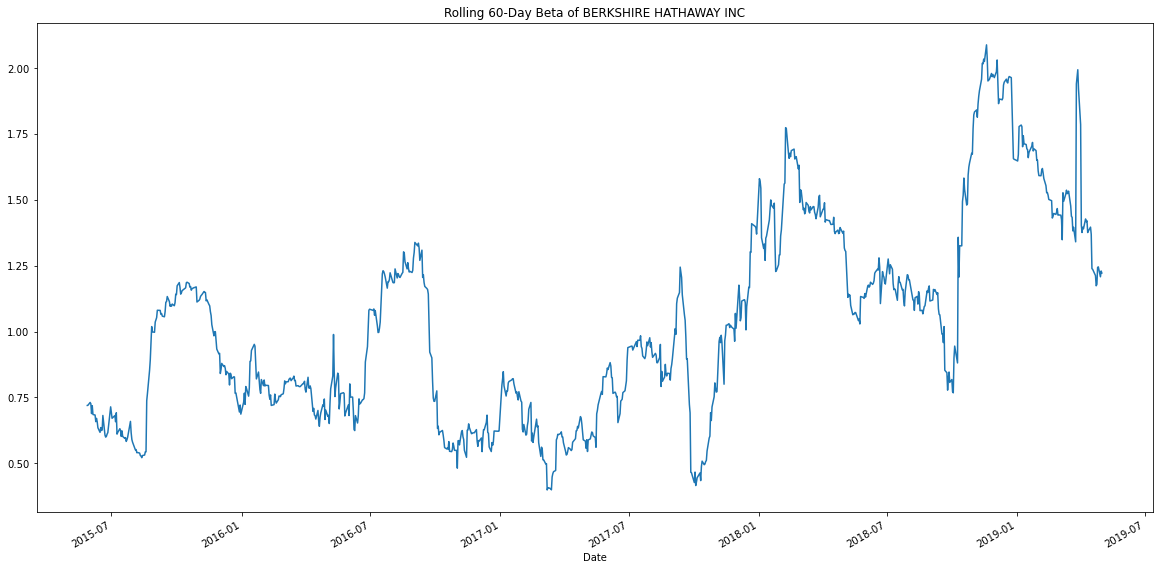

In [23]:
# Calculate covariance of a single portfolio
covariance_berkshire_rolling = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['S&P TSX'])
# Calculate variance of S&P TSX
variance_sp_rolling = combined_df['S&P TSX'].rolling(window=60).var()
# Computing beta
tiger_beta = covariance_berkshire_rolling / variance_sp_rolling
# Plot beta trend
tiger_beta.plot(figsize=(20,10), title='Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [46]:
# Use `ewm` to calculate the rolling window
exp_avg = combined_df.ewm(halflife = 21).std()
exp_avg

,SOROS FUND MANAGEMENT LLC,PAULSON AND CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517
...,...,...,...,...,...,...,...
2019-04-25,0.006819,0.006342,0.014811,0.010830,0.006526,0.007500,0.004700
2019-04-26,0.006819,0.006448,0.014764,0.010763,0.006433,0.007418,0.004628
2019-04-29,0.006708,0.006357,0.014575,0.010601,0.006378,0.007304,0.004564


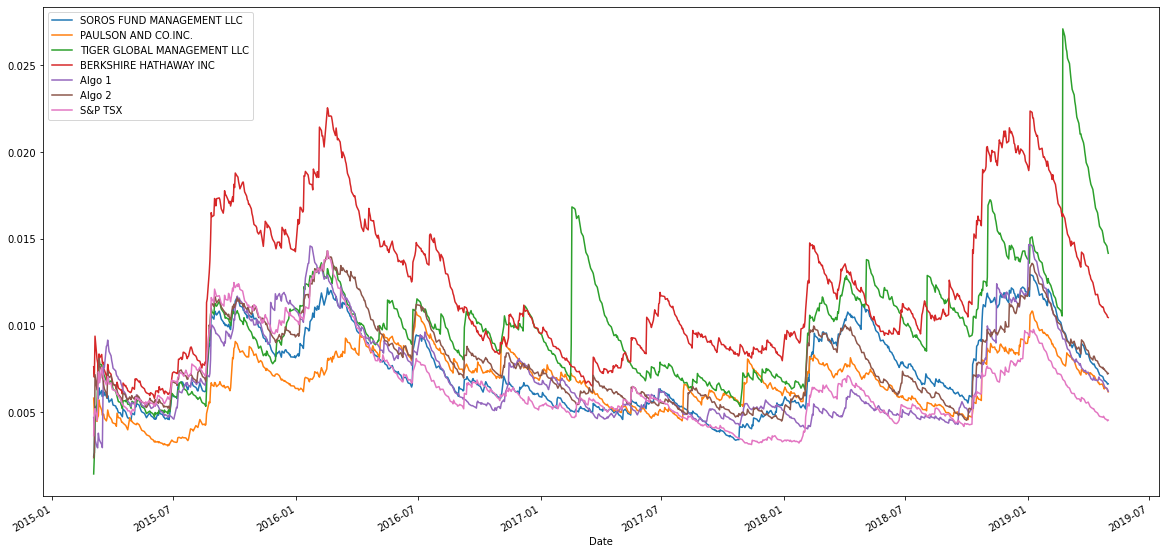

In [48]:
exp_avg.plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / annulized_std
sharpe_ratios = sharpe_ratios.sort_values(ascending=False)
sharpe_ratios

Algo 1                         1.491514
BERKSHIRE HATHAWAY INC         0.467045
Algo 2                         0.396817
SOROS FUND MANAGEMENT LLC      0.286709
S&P TSX                        0.195550
TIGER GLOBAL MANAGEMENT LLC   -0.144455
PAULSON AND CO.INC.           -0.547594
dtype: float64

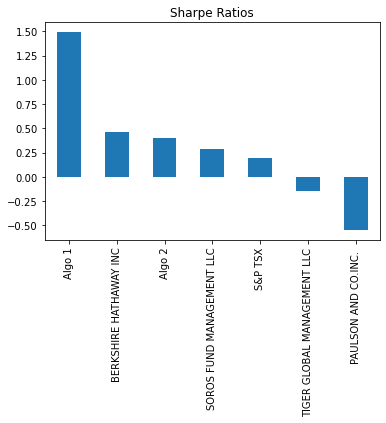

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar',  title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

From the bar chart above, we can find Algo 1 outperfomed both the market and the whales portfolios. While the sharpe ratio of Algo 2 outperformed the market and most of portfolios in whales except for Berkshire Hathaway. 

---


# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `TLSA` - [Tesla Inc](https://en.wikipedia.org/wiki/Tesla,_Inc.)

* `GILD` - [Gilead Sciences Inc](https://en.wikipedia.org/wiki/Gilead_Sciences)

In [28]:
# Reading data from 1st stock
shop_path = Path('Resources/shop_historical.csv')
shop_df = pd.read_csv(shop_path, index_col = 'Date', infer_datetime_format=True, parse_dates=True)
shop_df

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51
...,...,...
2019-12-20,SHOP,513.22
2019-12-23,SHOP,511.62
2019-12-24,SHOP,525.39


In [29]:
# Reading data from 2nd stock
tsla_path = Path('Resources/tsla_historical.csv')
tsla_df = pd.read_csv(tsla_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
tsla_df

,Symbol,Close
Date,,
2018-02-01,TSLA,64.11
2018-03-01,TSLA,63.45
2018-04-01,TSLA,62.92
2018-05-01,TSLA,63.32
2018-08-01,TSLA,67.28
...,...,...
2019-12-23,TSLA,83.84
2019-12-24,TSLA,85.05
2019-12-26,TSLA,86.19


In [30]:
# Reading data from 3rd stock
gild_path = Path('Resources/gild_historical.csv')
gild_df = pd.read_csv(gild_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
gild_df

,Symbol,Close
Date,,
2018-02-01,GILD,74.10
2018-03-01,GILD,74.66
2018-04-01,GILD,73.90
2018-05-01,GILD,74.52
2018-08-01,GILD,74.40
...,...,...
2019-12-23,GILD,66.75
2019-12-24,GILD,66.72
2019-12-26,GILD,66.39


In [31]:
# Combine all stocks in a single DataFrame
combined_df_stocks = pd.concat([shop_df, tsla_df, gild_df], axis='columns', join='inner')
combined_df_stocks

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,SHOP,132.06,TSLA,69.85,GILD,83.49
2018-01-03,SHOP,135.15,TSLA,66.19,GILD,77.53
2018-01-05,SHOP,137.26,TSLA,59.98,GILD,72.56
2018-01-08,SHOP,139.51,TSLA,60.17,GILD,77.90
2018-01-10,SHOP,139.29,TSLA,62.14,GILD,77.96
...,...,...,...,...,...,...
2019-12-20,SHOP,513.22,TSLA,81.12,GILD,66.85
2019-12-23,SHOP,511.62,TSLA,83.84,GILD,66.75
2019-12-24,SHOP,525.39,TSLA,85.05,GILD,66.72


In [32]:
# Reset Date index
combined_df_stocks = combined_df_stocks.drop(columns=['Symbol', 'Symbol', 'Symbol'])
combined_df_stocks.sort_index()

,Close,Close,Close
Date,,,
2018-01-02,132.06,69.85,83.49
2018-01-03,135.15,66.19,77.53
2018-01-05,137.26,59.98,72.56
2018-01-08,139.51,60.17,77.90
2018-01-10,139.29,62.14,77.96
...,...,...,...
2019-12-20,513.22,81.12,66.85
2019-12-23,511.62,83.84,66.75
2019-12-24,525.39,85.05,66.72


In [33]:
# Reorganize portfolio data by having a column per symbol

combined_df_stocks.columns = ['SHOP', 'TSLA', 'GILD']
combined_df_stocks

,SHOP,TSLA,GILD
Date,,,
2018-01-02,132.06,69.85,83.49
2018-01-03,135.15,66.19,77.53
2018-01-05,137.26,59.98,72.56
2018-01-08,139.51,60.17,77.90
2018-01-10,139.29,62.14,77.96
...,...,...,...
2019-12-20,513.22,81.12,66.85
2019-12-23,511.62,83.84,66.75
2019-12-24,525.39,85.05,66.72


In [34]:
# Calculate daily returns
returns = combined_df_stocks.pct_change()
# Drop NAs
returns = returns.dropna().copy()
# Display sample data
returns

,SHOP,TSLA,GILD
Date,,,
2018-01-03,0.023398,-0.052398,-0.071386
2018-01-05,0.015612,-0.093821,-0.064104
2018-01-08,0.016392,0.003168,0.073594
2018-01-10,-0.001577,0.032741,0.000770
2018-01-11,-0.001077,0.108143,-0.098127
...,...,...,...
2019-12-20,-0.005503,0.003836,0.023893
2019-12-23,-0.003118,0.033531,-0.001496
2019-12-24,0.026915,0.014432,-0.000449


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio = returns.dot(weights)
# Display sample data
portfolio

Date
2018-01-03   -0.033462
2018-01-05   -0.047438
2018-01-08    0.031051
2018-01-10    0.010645
2018-01-11    0.002980
                ...   
2019-12-20    0.007409
2019-12-23    0.009639
2019-12-24    0.013632
2019-12-27    0.006135
2019-12-30   -0.027893
Length: 438, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame
compare = pd.concat([combined_df, portfolio], axis='columns', join='outer')
compare = compare.rename(columns={0:'portfolio'})
compare

,SOROS FUND MANAGEMENT LLC,PAULSON AND CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,NaN
...,...,...,...,...,...,...,...,...
2019-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007409
2019-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009639
2019-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013632


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

compare = compare.dropna()
compare

,SOROS FUND MANAGEMENT LLC,PAULSON AND CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,-0.033462
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.047438
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,0.031051
2018-01-10,-0.002753,-0.002290,-0.005720,-0.004781,0.003567,-0.000224,-0.004368,0.010645
2018-01-11,0.010541,0.011773,-0.002063,0.017662,-0.005614,0.016898,0.002400,0.002980
...,...,...,...,...,...,...,...,...
2019-04-24,0.002284,0.001009,-0.004000,-0.006386,0.001095,0.000399,-0.004972,-0.011747
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,-0.008144
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,-0.007366


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [38]:
# Calculate the annualized `std`
std_compare= compare.std() * np.sqrt(252)
std_compare.sort_values(ascending=False)

portfolio                      0.633622
BERKSHIRE HATHAWAY INC         0.232461
TIGER GLOBAL MANAGEMENT LLC    0.219085
SOROS FUND MANAGEMENT LLC      0.148734
Algo 2                         0.139581
Algo 1                         0.124066
PAULSON AND CO.INC.            0.116029
S&P TSX                        0.100254
dtype: float64

### Calculate and plot rolling `std` with 21-day window

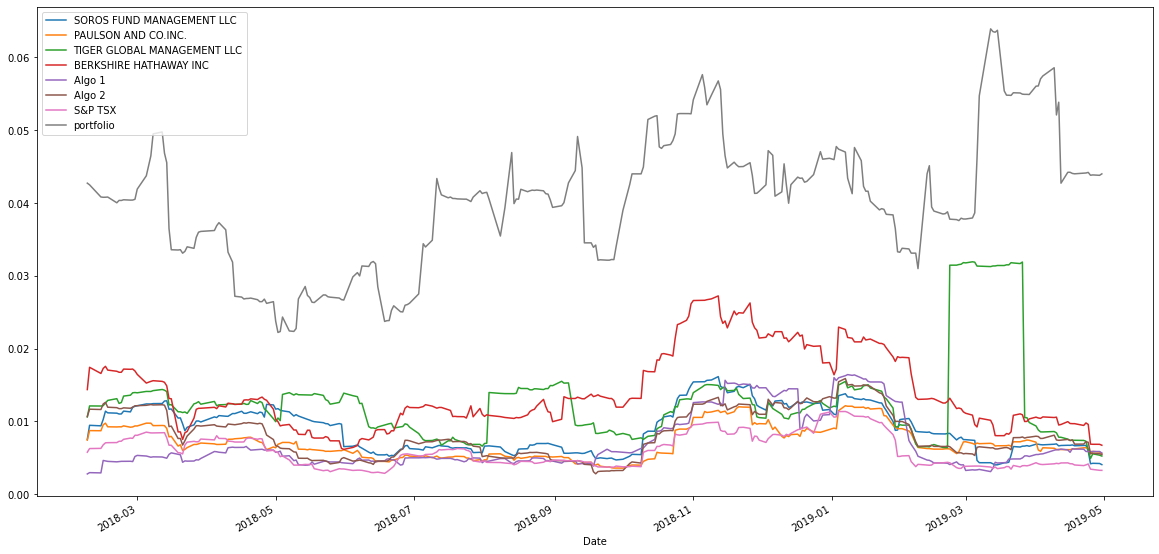

In [39]:
# Calculate rolling standard deviation
std_roll_comp = compare.rolling(window=21).std()
# Plot rolling standard deviation
std_roll_comp.plot(figsize=(20,10))

### Calculate and plot the correlation

In [40]:
# Calculate and plot the correlation
correlation_comp = compare.corr()
correlation_comp

,SOROS FUND MANAGEMENT LLC,PAULSON AND CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.766447,0.530701,0.786469,0.304030,0.834301,0.683857,0.267480
PAULSON AND CO.INC.,0.766447,1.000000,0.530736,0.652891,0.325607,0.805659,0.645789,0.191480
TIGER GLOBAL MANAGEMENT LLC,0.530701,0.530736,1.000000,0.377507,0.132041,0.486502,0.444166,0.105198
BERKSHIRE HATHAWAY INC,0.786469,0.652891,0.377507,1.000000,0.300222,0.787204,0.661697,0.331283
Algo 1,0.304030,0.325607,0.132041,0.300222,1.000000,0.330495,0.285560,0.124877
Algo 2,0.834301,0.805659,0.486502,0.787204,0.330495,1.000000,0.758362,0.292498
S&P TSX,0.683857,0.645789,0.444166,0.661697,0.285560,0.758362,1.000000,0.216740
portfolio,0.267480,0.191480,0.105198,0.331283,0.124877,0.292498,0.216740,1.000000


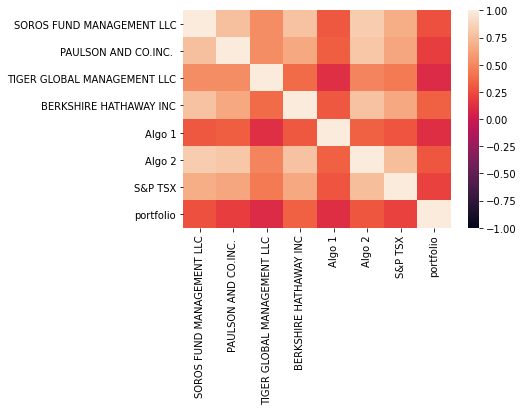

In [41]:
# Use the `heatmap` function from the seaborn library to visualize correlations
import seaborn as sns
sns.heatmap(correlation_comp,vmin=-1, vmax=1)

### Calculate and Plot Beta for Your Portfolio compared to the S&P 60 TSX

In [42]:
# Calculate and plot Beta
covariance_port_rolling = compare['portfolio'].rolling(window=60).cov(compare['S&P TSX'])
variance_sp_rolling_2 = compare['S&P TSX'].rolling(window=60).var()
Beta_port = covariance_port_rolling / variance_sp_rolling_2
Beta_port

Date
2018-01-03         NaN
2018-01-05         NaN
2018-01-08         NaN
2018-01-10         NaN
2018-01-11         NaN
                ...   
2019-04-24    1.475543
2019-04-25    1.747831
2019-04-26    1.774044
2019-04-29    1.700135
2019-04-30    1.644149
Length: 295, dtype: float64

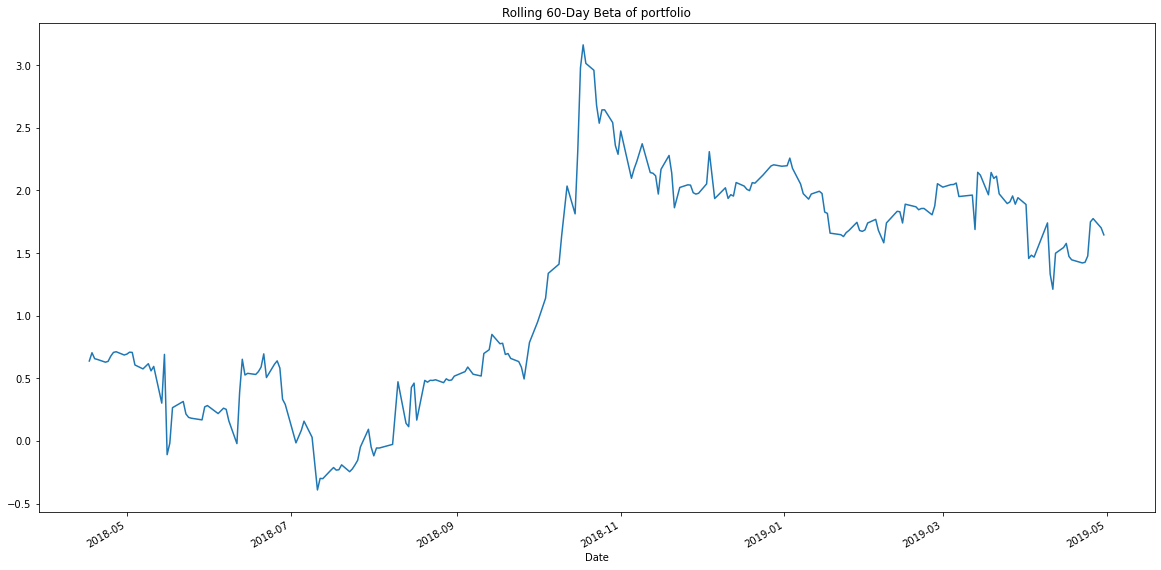

In [43]:
Beta_port.plot(figsize=(20,10), title = 'Rolling 60-Day Beta of portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [44]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_2 = (compare.mean() * 252) / std_compare
sharpe_ratios_2 = sharpe_ratios_2.sort_values(ascending=False)
sharpe_ratios_2

Algo 1                         1.877882
portfolio                      0.967249
S&P TSX                       -0.032352
BERKSHIRE HATHAWAY INC        -0.044358
SOROS FUND MANAGEMENT LLC     -0.190059
Algo 2                        -0.304796
PAULSON AND CO.INC.           -0.634260
TIGER GLOBAL MANAGEMENT LLC   -1.263958
dtype: float64

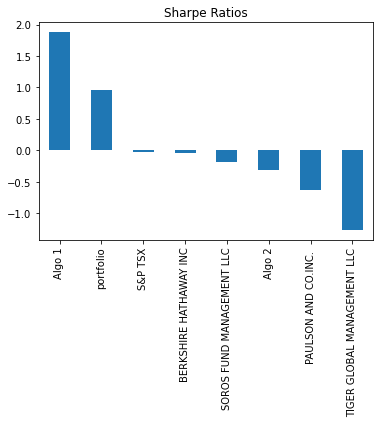

In [45]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_2.plot(kind='bar',  title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

The performance of customed portfolio is pretty good during 2018/01/02 to 2019/04/30. Its Sharpe ratio is larger than both Whale and algorithmic trading portfolios except for Algo 1. 